# Load Data

In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
path = 'I:\data_analyst\Data Crawler\Data x 1\Hasil_Preprocessing_DataPanasBumi.csv'
df = pd.read_csv(path)
df.sample(5)

,full_text,cleansing,Tokenization and Case Folding,Filtering / Stopword removal,stemming_data
256,@banjarbase B apa sarumah wn mntuha Wan kuitan...,banjarbase B apa sarumah wn mntuha Wan kuitan ...,"['banjarbase', 'b', 'apa', 'sarumah', 'wn', 'm...","['banjarbase', 'b', 'sarumah', 'wn', 'mntuha',...",banjarbase b sarumah wn mntuha wan kuit sauran...
412,@T_E_S_L_A_ @trschatz51 todos son unos narcos ...,TESLA trschatz todos son unos narcos o panas d...,"['tesla', 'trschatz', 'todos', 'son', 'unos', ...","['tesla', 'trschatz', 'todos', 'son', 'unos', ...",tesla trschatz todos son unos narcos o panas d...
350,@herricahyadi Kalau hujan pakai jas hujan atau...,herricahyadi Kalau hujan pakai jas hujan atau ...,"['herricahyadi', 'kalau', 'hujan', 'pakai', 'j...","['herricahyadi', 'hujan', 'pakai', 'jas', 'huj...",herricahyadi hujan pakai jas hujan payung kalo...
22,"[Cm] Real cuy mana panas-panasan lagi, sampe k...",Cm Real cuy mana panaspanasan lagi sampe ke ka...,"['cm', 'real', 'cuy', 'mana', 'panaspanasan', ...","['cm', 'real', 'cuy', 'panaspanasan', 'sampe',...",cm real cuy panaspanasan sampe kampus sempet d...
275,@Malaythai11 yg komen2 panas tu nape busuk hat...,Malaythai yg komen panas tu nape busuk hati dg...,"['malaythai', 'yg', 'komen', 'panas', 'tu', 'n...","['malaythai', 'yg', 'komen', 'panas', 'tu', 'n...",malaythai yg komen panas tu nape busuk hati dg...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   full_text                      445 non-null    object
 1   cleansing                      445 non-null    object
 2   Tokenization and Case Folding  445 non-null    object
 3   Filtering / Stopword removal   445 non-null    object
 4   stemming_data                  445 non-null    object
dtypes: object(5)
memory usage: 17.5+ KB


In [4]:
df = pd.DataFrame(df['stemming_data'])
print(type(df))
df.sample(5)

<class 'pandas.core.frame.DataFrame'>


,stemming_data
418,riyanto chroniclea maksud fasilitas tunjang mo...
59,nuuurani tertaqwa panas yh telinga ku
69,yoschda abis beberes el panas mandi kalo ga be...
66,kitcat abis beberes tauk monn panas mandi lagiii
156,gua jg tuju trotoar jpo atap batam pohon gede ...


In [5]:
# !pip install VaderSentiment

In [6]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [7]:
scores = [sia.polarity_scores(x) for x in df['stemming_data']]
df['Compound_Score'] = [x['compound'] for x in scores]

df.sample(5)

,stemming_data,Compound_Score
204,eduardomenoni no hables as de tus panas calich...,-0.5267
203,moga matahari panas jemur kering,0.0000
182,carinosocatador robertsw yo le digo eso a los ...,0.0000
215,estebanavila los negocios de los panas de la fef,0.0000
179,ya ga heran sih kalo badan panas kemarin udah ...,-0.2732


In [8]:
df.loc[df['Compound_Score'] < 0, 'sentiment'] = 'negatif'
df.loc[df['Compound_Score'] == 0, 'sentiment'] = 'netral'
df.loc[df['Compound_Score'] > 0, 'sentiment'] = 'positif'

df.sample(5)

,stemming_data,Compound_Score,sentiment
277,mykhaylo mudryk mco vs leeds gol disparos al m...,0.0,netral
84,tgunwook panas,0.0,netral
62,pagi pagi udh panas gerah mamaaaaaa,0.0,netral
4,teknologi nama payung topi drpd jpo diatapin m...,0.0,netral
418,riyanto chroniclea maksud fasilitas tunjang mo...,0.0,netral


# VISUALISASI DATA

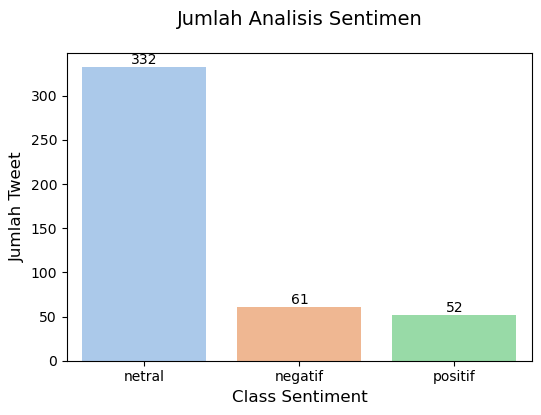

In [9]:
sentiment_count = df['sentiment'].value_counts()

# sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(6,4))
ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')
plt.title('Jumlah Analisis Sentimen', fontsize=14, pad=20)
plt.xlabel('Class Sentiment', fontsize=12)
plt.ylabel('Jumlah Tweet', fontsize=12)

for i, count in enumerate(sentiment_count.values):
    ax.text(i, count+0.10, str(count), va='bottom',ha='center')

plt.show()

# Save Data to CSV

In [10]:
df.to_csv('Hasil_Labeling_DataPanasBumi_vadersentiment.csv', encoding='utf8', index=False)